# Australian Housing Prediction

### Objective:
Model to identify factors influencing Pricing of Housing unit by Area. To understand the pricing dynamics in a new market

In [134]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import PolynomialFeatures, MinMaxScaler
from sklearn.model_selection import train_test_split

from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score

from datetime import date

#Ignore Warnings

import warnings
warnings.filterwarnings('ignore')



### Understand the Data

In [135]:
### View all Columns of dataset
pd. set_option ('display.max_columns', None)

In [136]:
#Read dataset
df = pd.read_csv("train.csv")

In [137]:
#Display top 5 rows of the dataframe
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


### Analyze the dataset.

In [138]:
#Understand the dataset and Identify columns to drop : Duplicate Columns, Null Value, Columns which do not make value to the analysis using the value_counts() function

df.info (verbose=True,null_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [139]:
df.shape

(1460, 81)

### Data Preparation

#### Checking for Null Values

In [140]:
#Find number of rows which has missing values

df.isnull().sum(axis=0)

Id                  0
MSSubClass          0
MSZoning            0
LotFrontage       259
LotArea             0
Street              0
Alley            1369
LotShape            0
LandContour         0
Utilities           0
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
RoofStyle           0
RoofMatl            0
Exterior1st         0
Exterior2nd         0
MasVnrType          8
MasVnrArea          8
ExterQual           0
ExterCond           0
Foundation          0
BsmtQual           37
BsmtCond           37
BsmtExposure       38
BsmtFinType1       37
BsmtFinSF1          0
BsmtFinType2       38
BsmtFinSF2          0
BsmtUnfSF           0
TotalBsmtSF         0
Heating             0
HeatingQC           0
CentralAir          0
Electrical          1
1stFlrSF            0
2ndFlrSF            0
LowQualFin

In [141]:
# Drop Columns having less than 200 (~15%) missing values 

df.dropna(axis=1,inplace=True,thresh=1300)

In [142]:
#Use padding method to impute data for missing values for rows retained

df.pad(axis=0,inplace=True) 
df.shape

(1460, 75)

In [143]:
#Use padding method to impute data for missing values for rows retained

df.pad(axis=0,inplace=True) 
df.shape

(1460, 75)

In [144]:
# Now Dataframe is complete

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 75 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   LotShape       1460 non-null   object 
 6   LandContour    1460 non-null   object 
 7   Utilities      1460 non-null   object 
 8   LotConfig      1460 non-null   object 
 9   LandSlope      1460 non-null   object 
 10  Neighborhood   1460 non-null   object 
 11  Condition1     1460 non-null   object 
 12  Condition2     1460 non-null   object 
 13  BldgType       1460 non-null   object 
 14  HouseStyle     1460 non-null   object 
 15  OverallQual    1460 non-null   int64  
 16  OverallCond    1460 non-null   int64  
 17  YearBuilt      1460 non-null   int64  
 18  YearRemo

In [145]:
#Verfiy
df.isnull().sum(axis=0)
df.isnull().sum(axis=1)

0       0
1       0
2       0
3       0
4       0
5       0
6       0
7       0
8       0
9       0
10      0
11      0
12      0
13      0
14      0
15      0
16      0
17      0
18      0
19      0
20      0
21      0
22      0
23      0
24      0
25      0
26      0
27      0
28      0
29      0
30      0
31      0
32      0
33      0
34      0
35      0
36      0
37      0
38      0
39      0
40      0
41      0
42      0
43      0
44      0
45      0
46      0
47      0
48      0
49      0
50      0
51      0
52      0
53      0
54      0
55      0
56      0
57      0
58      0
59      0
60      0
61      0
62      0
63      0
64      0
65      0
66      0
67      0
68      0
69      0
70      0
71      0
72      0
73      0
74      0
75      0
76      0
77      0
78      0
79      0
80      0
81      0
82      0
83      0
84      0
85      0
86      0
87      0
88      0
89      0
90      0
91      0
92      0
93      0
94      0
95      0
96      0
97      0
98      0
99      0


In [146]:
#analyze each Column information to understand ditribution of the dataset,identify duplicate, redundant columns, columns candidate for merge, identify derived columns
print("GarageQual\n")
print(df['GarageQual'].value_counts())
print("--------------------------\n")
print("BsmtFinType1\n")
print(df['BsmtFinType1'].value_counts())
print("--------------------------\n")
print("ExtraQual\n")
print(df['ExterQual'].value_counts())
print("--------------------------\n")
print("LandSlope\n")
print(df['LandSlope'].value_counts())
print("--------------------------\n")
print("MSSubClass\n")
print(df['MSSubClass'].value_counts())
print("--------------------------\n")
print("Street\n")
print(df['Street'].value_counts())
print("--------------------------\n")
print("LotShape\n")
print(df['LotShape'].value_counts())
print("--------------------------\n")
print("LandContour\n")
print(df['LandContour'].value_counts())
print("--------------------------\n")
print("LotShape\n")
print(df['LotShape'].value_counts())
print("--------------------------\n")
print("BldgType\n")
print(df['BldgType'].value_counts())
print("--------------------------\n")
print("OverallCond\n")
print(df['OverallCond'].value_counts())
print("--------------------------\n")
print("YearBuilt\n")
print(df['YearBuilt'].value_counts())
print("--------------------------\n")
print("OverallQaul\n")
print(df['OverallQual'].value_counts())
print("--------------------------\n")
print("PoolArea\n")
print(df['PoolArea'].value_counts())
print("--------------------------\n")
print("Heating\n")
print(df['Heating'].value_counts())
print("--------------------------\n")
print("PoolArea\n")
print(df['PoolArea'].value_counts())
print("--------------------------\n")
print("Utiliities\n")
print(df['Utilities'].value_counts())
print("--------------------------\n")
print("LandSlope\n")
print(df['LandSlope'].value_counts())
print("--------------------------\n")
print("PavedDrive\n")
print(df['PavedDrive'].value_counts())

GarageQual

TA    1385
Fa      53
Gd      16
Ex       3
Po       3
Name: GarageQual, dtype: int64
--------------------------

BsmtFinType1

Unf    442
GLQ    428
ALQ    229
BLQ    150
Rec    136
LwQ     75
Name: BsmtFinType1, dtype: int64
--------------------------

ExtraQual

TA    906
Gd    488
Ex     52
Fa     14
Name: ExterQual, dtype: int64
--------------------------

LandSlope

Gtl    1382
Mod      65
Sev      13
Name: LandSlope, dtype: int64
--------------------------

MSSubClass

20     536
60     299
50     144
120     87
30      69
160     63
70      60
80      58
90      52
190     30
85      20
75      16
45      12
180     10
40       4
Name: MSSubClass, dtype: int64
--------------------------

Street

Pave    1454
Grvl       6
Name: Street, dtype: int64
--------------------------

LotShape

Reg    925
IR1    484
IR2     41
IR3     10
Name: LotShape, dtype: int64
--------------------------

LandContour

Lvl    1311
Bnk      63
HLS      50
Low      36
Name: LandContour, dty

In [147]:
# Combine Columns to Form new column Variables where possible

df['BsmtBath'] = (df['BsmtFullBath']+df['BsmtHalfBath']).astype('int')
df['TotalSF'] = (df['1stFlrSF']+df['2ndFlrSF']+df['GrLivArea']).astype('int')
df['TotalPorch'] =(df['OpenPorchSF']+df['EnclosedPorch']+df['3SsnPorch']+df['ScreenPorch'])

In [148]:
#Drop Columns Street, Utilities & RoofMatl as the values are same for all property type so the influence will be same to the target variable
df = df.drop(['Street','Utilities','RoofMatl'],axis=1)

#Drop Column PoolArea as 99% of the properties have 0 pool area
df = df.drop(['PoolArea'],axis=1)

#Based on Business Intelligence you can safely drop variable which do not have influence on the target variable
df = df.drop(['Id','SaleType','BsmtFinType2','LowQualFinSF','Exterior2nd','GarageQual','GarageFinish','GarageYrBlt','ScreenPorch','BsmtFullBath','BsmtHalfBath','ExterCond','BsmtFinType2','BsmtFinSF1','BsmtFinSF2','BsmtUnfSF','1stFlrSF','2ndFlrSF','GrLivArea','OpenPorchSF','EnclosedPorch','3SsnPorch','MiscVal','YearRemodAdd',"Condition1","Condition2","BsmtCond","GarageCond","MoSold"],axis=1)


In [149]:
df.head(10)

,MSSubClass,MSZoning,LotArea,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,RoofStyle,Exterior1st,MasVnrType,MasVnrArea,ExterQual,Foundation,BsmtQual,BsmtExposure,BsmtFinType1,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,GarageType,GarageCars,GarageArea,PavedDrive,WoodDeckSF,YrSold,SaleCondition,SalePrice,BsmtBath,TotalSF,TotalPorch
0,60,RL,8450,Reg,Lvl,Inside,Gtl,CollgCr,1Fam,2Story,7,5,2003,Gable,VinylSd,BrkFace,196.0,Gd,PConc,Gd,No,GLQ,856,GasA,Ex,Y,SBrkr,2,1,3,1,Gd,8,Typ,0,Attchd,2,548,Y,0,2008,Normal,208500,1,3420,61
1,20,RL,9600,Reg,Lvl,FR2,Gtl,Veenker,1Fam,1Story,6,8,1976,Gable,MetalSd,None,0.0,TA,CBlock,Gd,Gd,ALQ,1262,GasA,Ex,Y,SBrkr,2,0,3,1,TA,6,Typ,1,Attchd,2,460,Y,298,2007,Normal,181500,1,2524,0
2,60,RL,11250,IR1,Lvl,Inside,Gtl,CollgCr,1Fam,2Story,7,5,2001,Gable,VinylSd,BrkFace,162.0,Gd,PConc,Gd,Mn,GLQ,920,GasA,Ex,Y,SBrkr,2,1,3,1,Gd,6,Typ,1,Attchd,2,608,Y,0,2008,Normal,223500,1,3572,42
3,70,RL,9550,IR1,Lvl,Corner,Gtl,Crawfor,1Fam,2Story,7,5,1915,Gable,Wd Sdng,None,0.0,TA,BrkTil,TA,No,ALQ,756,GasA,Gd,Y,SBrkr,1,0,3,1,Gd,7,Typ,1,Detchd,3,642,Y,0,2006,Abnorml,140000,1,3434,307
4,60,RL,14260,IR1,Lvl,FR2,Gtl,NoRidge,1Fam,2Story,8,5,2000,Gable,VinylSd,BrkFace,350.0,Gd,PConc,Gd,Av,GLQ,1145,GasA,Ex,Y,SBrkr,2,1,4,1,Gd,9,Typ,1,Attchd,3,836,Y,192,2008,Normal,250000,1,4396,84
5,50,RL,14115,IR1,Lvl,Inside,Gtl,Mitchel,1Fam,1.5Fin,5,5,1993,Gable,VinylSd,None,0.0,TA,Wood,Gd,No,GLQ,796,GasA,Ex,Y,SBrkr,1,1,1,1,TA,5,Typ,0,Attchd,2,480,Y,40,2009,Normal,143000,1,2724,350
6,20,RL,10084,Reg,Lvl,Inside,Gtl,Somerst,1Fam,1Story,8,5,2004,Gable,VinylSd,Stone,186.0,Gd,PConc,Ex,Av,GLQ,1686,GasA,Ex,Y,SBrkr,2,0,3,1,Gd,7,Typ,1,Attchd,2,636,Y,255,2007,Normal,307000,1,3388,57
7,60,RL,10382,IR1,Lvl,Corner,Gtl,NWAmes,1Fam,2Story,7,6,1973,Gable,HdBoard,Stone,240.0,TA,CBlock,Gd,Mn,ALQ,1107,GasA,Ex,Y,SBrkr,2,1,3,1,TA,7,Typ,2,Attchd,2,484,Y,235,2009,Normal,200000,1,4180,432
8,50,RM,6120,Reg,Lvl,Inside,Gtl,OldTown,1Fam,1.5Fin,7,5,1931,Gable,BrkFace,None,0.0,TA,BrkTil,TA,No,Unf,952,GasA,Gd,Y,FuseF,2,0,2,2,TA,8,Min1,2,Detchd,2,468,Y,90,2008,Abnorml,129900,0,3548,205
9,190,RL,7420,Reg,Lvl,Corner,Gtl,BrkSide,2fmCon,1.5Unf,5,6,1939,Gable,MetalSd,None,0.0,TA,BrkTil,TA,No,GLQ,991,GasA,Ex,Y,SBrkr,1,0,2,2,TA,5,Typ,2,Attchd,1,205,Y,0,2008,Normal,118000,1,2154,4


In [150]:
df.shape

(1460, 46)

In [21]:
df.describe()

,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,MasVnrArea,TotalBsmtSF,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,GarageArea,WoodDeckSF,YrSold,SalePrice,BsmtBath,TotalSF,TotalPorch
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,56.897260,10516.828082,6.099315,5.575342,1971.267808,103.492466,1057.429452,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,1.767123,472.980137,94.244521,2007.815753,180921.195890,0.482877,3025.082877,87.084932
std,42.300571,9981.264932,1.382997,1.112799,30.202904,180.795612,438.705324,0.550916,0.502885,0.815778,0.220338,1.625393,0.644666,0.747315,213.804841,125.338794,1.328095,79442.502883,0.538174,1045.522787,105.190364
min,20.000000,1300.000000,1.000000,1.000000,1872.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,2006.000000,34900.000000,0.000000,668.000000,0.000000
25%,20.000000,7553.500000,5.000000,5.000000,1954.000000,0.000000,795.750000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1.000000,334.500000,0.000000,2007.000000,129975.000000,0.000000,2252.000000,0.000000
50%,50.000000,9478.500000,6.000000,5.000000,1973.000000,0.000000,991.500000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,2.000000,480.000000,0.000000,2008.000000,163000.000000,0.000000,2916.000000,48.000000
75%,70.000000,11601.500000,7.000000,6.000000,2000.000000,165.250000,1298.250000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2.000000,576.000000,168.000000,2009.000000,214000.000000,1.000000,3553.500000,136.000000
max,190.000000,215245.000000,10.000000,9.000000,2010.000000,1600.000000,6110.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,4.000000,1418.000000,857.000000,2010.000000,755000.000000,3.000000,11284.000000,1027.000000


In [151]:
#Convert Y to 1 and N to 0

varlist =  ['CentralAir']

# Defining the map function
def binary_map(x):
    return x.map({'Y': 1, "N": 0})

# Applying the function to the housing list
df[varlist] = df[varlist].apply(binary_map)

In [152]:
#Convert to DataTime

df['YearBuilt'] = pd.DatetimeIndex(df.YearBuilt.astype('str'))


In [153]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 46 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   MSSubClass     1460 non-null   int64         
 1   MSZoning       1460 non-null   object        
 2   LotArea        1460 non-null   int64         
 3   LotShape       1460 non-null   object        
 4   LandContour    1460 non-null   object        
 5   LotConfig      1460 non-null   object        
 6   LandSlope      1460 non-null   object        
 7   Neighborhood   1460 non-null   object        
 8   BldgType       1460 non-null   object        
 9   HouseStyle     1460 non-null   object        
 10  OverallQual    1460 non-null   int64         
 11  OverallCond    1460 non-null   int64         
 12  YearBuilt      1460 non-null   datetime64[ns]
 13  RoofStyle      1460 non-null   object        
 14  Exterior1st    1460 non-null   object        
 15  MasVnrType     1460 n

In [154]:
dummy1 = pd.get_dummies(df[['MSZoning','LotShape','LandContour','LotConfig','LandSlope','Neighborhood','BldgType','HouseStyle','RoofStyle','Exterior1st','MasVnrType','ExterQual','Foundation','BsmtQual','BsmtExposure','BsmtFinType1','Heating','HeatingQC','Electrical','KitchenQual','Functional','GarageType','PavedDrive','SaleCondition']],drop_first=True)

# Adding the results to the master dataframe
df = pd.concat([df, dummy1], axis=1)

In [155]:
df.head(2)

,MSSubClass,MSZoning,LotArea,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,RoofStyle,Exterior1st,MasVnrType,MasVnrArea,ExterQual,Foundation,BsmtQual,BsmtExposure,BsmtFinType1,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,GarageType,GarageCars,GarageArea,PavedDrive,WoodDeckSF,YrSold,SaleCondition,SalePrice,BsmtBath,TotalSF,TotalPorch,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_HLS,LandContour_Low,LandContour_Lvl,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_Mod,LandSlope_Sev,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_TA,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_Rec,BsmtFinType1_Unf,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sev,Functional_Typ,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,PavedDrive_P,PavedDrive_Y,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,60,RL,8450,Reg,Lvl,Inside,Gtl,CollgCr,1Fam,2Story,7,5,2003-01-01,Gable,VinylSd,BrkFace,196.0,Gd,PConc,Gd,No,GLQ,856,GasA,Ex,1,SBrkr,2,1,3,1,Gd,8,Typ,0,Attchd,2,548,Y,0,2008,Normal,208500,1,3420,61,0,0,1,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,1,0,0,0,0,0,1,0,0,0,1,0
1,20,RL,9600,Reg,Lvl,FR2,Gtl,Veenker,1Fam,1Story,6,8,1976-01-01,Gable,MetalSd,None,0.0,TA,CBlock,Gd,Gd,ALQ,1262,GasA,Ex,1,SBrkr,2,0,3,1,TA,6,Typ,1,Attchd,2,460,Y,298,2007,Normal,181500,1,2524,0,0,0,1,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,1,0,0,0,1,0


In [156]:
df.shape

(1460, 172)

In [157]:
#Dummy Variables Created we can drop the columns

df = df.drop(['MSZoning','LotShape','LandContour','LotConfig','LandSlope','Neighborhood','BldgType','HouseStyle','RoofStyle','Exterior1st','MasVnrType','ExterQual','Foundation','BsmtQual','BsmtExposure','BsmtFinType1','Heating','HeatingQC','Electrical','KitchenQual','Functional','GarageType','PavedDrive','SaleCondition','GarageCars'],axis=1)

In [158]:
df.shape

(1460, 147)

In [159]:
df.head(2)

,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,MasVnrArea,TotalBsmtSF,CentralAir,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageArea,WoodDeckSF,YrSold,SalePrice,BsmtBath,TotalSF,TotalPorch,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_HLS,LandContour_Low,LandContour_Lvl,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_Mod,LandSlope_Sev,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_TA,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_Rec,BsmtFinType1_Unf,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sev,Functional_Typ,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,PavedDrive_P,PavedDrive_Y,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,60,8450,7,5,2003-01-01,196.0,856,1,2,1,3,1,8,0,548,0,2008,208500,1,3420,61,0,0,1,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,1,0,0,0,0,0,1,0,0,0,1,0
1,20,9600,6,8,1976-01-01,0.0,1262,1,2,0,3,1,6,1,460,298,2007,181500,1,2524,0,0,0,1,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,1,0,0,0,1,0


In [160]:
df_numeric = df.select_dtypes(include=['float64', 'int64','int32'])

In [161]:
df_numeric.head()

,MSSubClass,LotArea,OverallQual,OverallCond,MasVnrArea,TotalBsmtSF,CentralAir,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageArea,WoodDeckSF,YrSold,SalePrice,BsmtBath,TotalSF,TotalPorch
0,60,8450,7,5,196.0,856,1,2,1,3,1,8,0,548,0,2008,208500,1,3420,61
1,20,9600,6,8,0.0,1262,1,2,0,3,1,6,1,460,298,2007,181500,1,2524,0
2,60,11250,7,5,162.0,920,1,2,1,3,1,6,1,608,0,2008,223500,1,3572,42
3,70,9550,7,5,0.0,756,1,1,0,3,1,7,1,642,0,2006,140000,1,3434,307
4,60,14260,8,5,350.0,1145,1,2,1,4,1,9,1,836,192,2008,250000,1,4396,84


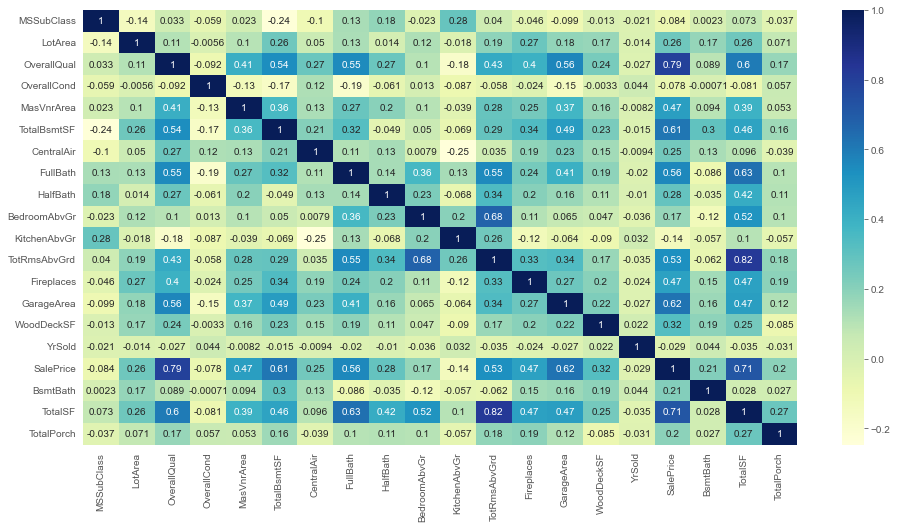

In [162]:
# plotting correlations on a heatmap

# figure size
plt.figure(figsize=(16,8))

# heatmap
sns.heatmap(df_numeric.corr(), cmap="YlGnBu", annot=True)
plt.show()

The Heatmap shows correlation of SalePrice variable with Independent variables also indicates the relationship betwen independent Variables leading to multicolinearity

Sale Price is possitively correlated with TotalSF,OverallQual,FullBath availability,Fireplace,GarageArea,TotalBsmtSF and is negatively correlated with MSSubClass,OverallCond,kitchenAboveGrnd,YrSold

Independent varaible OverallQual is possitively correlated with GarageArea,FullBath,TotalBsmtSF

Also you might observe there is no strong correlation between many independent variables YrSold,KitchenAbvGrnd...

In [163]:
df.head()
#df.columns



,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,MasVnrArea,TotalBsmtSF,CentralAir,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageArea,WoodDeckSF,YrSold,SalePrice,BsmtBath,TotalSF,TotalPorch,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_HLS,LandContour_Low,LandContour_Lvl,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_Mod,LandSlope_Sev,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_TA,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_Rec,BsmtFinType1_Unf,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sev,Functional_Typ,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,PavedDrive_P,PavedDrive_Y,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,60,8450,7,5,2003-01-01,196.0,856,1,2,1,3,1,8,0,548,0,2008,208500,1,3420,61,0,0,1,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,1,0,0,0,0,0,1,0,0,0,1,0
1,20,9600,6,8,1976-01-01,0.0,1262,1,2,0,3,1,6,1,460,298,2007,181500,1,2524,0,0,0,1,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,1,0,0,0,1,0
2,60,11250,7,5,2001-01-01,162.0,920,1,2,1,3,1,6,1,608,0,2008,223500,1,3572,42,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,1,0,0,0,0,0,1,0,0,0,1,0
3,70,9550,7,5,1915-01-01,0.0,756,1,1,0,3,1,7,1,642,0,2006,140000,1,3434,307,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0
4,60,14260,8,5,2000-01-01,350.0,1145,1,2,1,4,1,9,1,836,192,2008,250000,1,4396,84,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,

### Univariate Analysis

In [164]:
plt.figure(figsize=[8,6])
plt.show()

<Figure size 576x432 with 0 Axes>

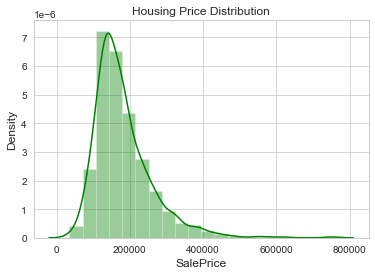

In [165]:
#Describe the Housing Price Distribution
sns.set_style("whitegrid")
sns.distplot(df.SalePrice, bins=20, color="g")
plt.title("Housing Price Distribution", fontsize=12)
plt.show()

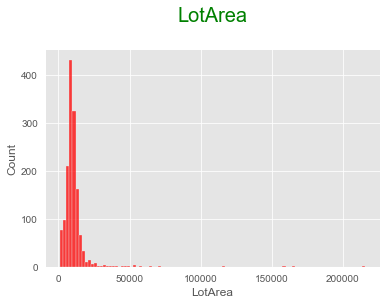

In [166]:
# LotArea distribution
plt.style.use("ggplot")
sns.histplot(df['LotArea'],bins=100,color='r')
plt.title("LotArea\n", fontdict={'fontsize': 20, 'fontweight' : 20, 'color' : 'Green'})
plt.show()

### Bi Variate Analysis

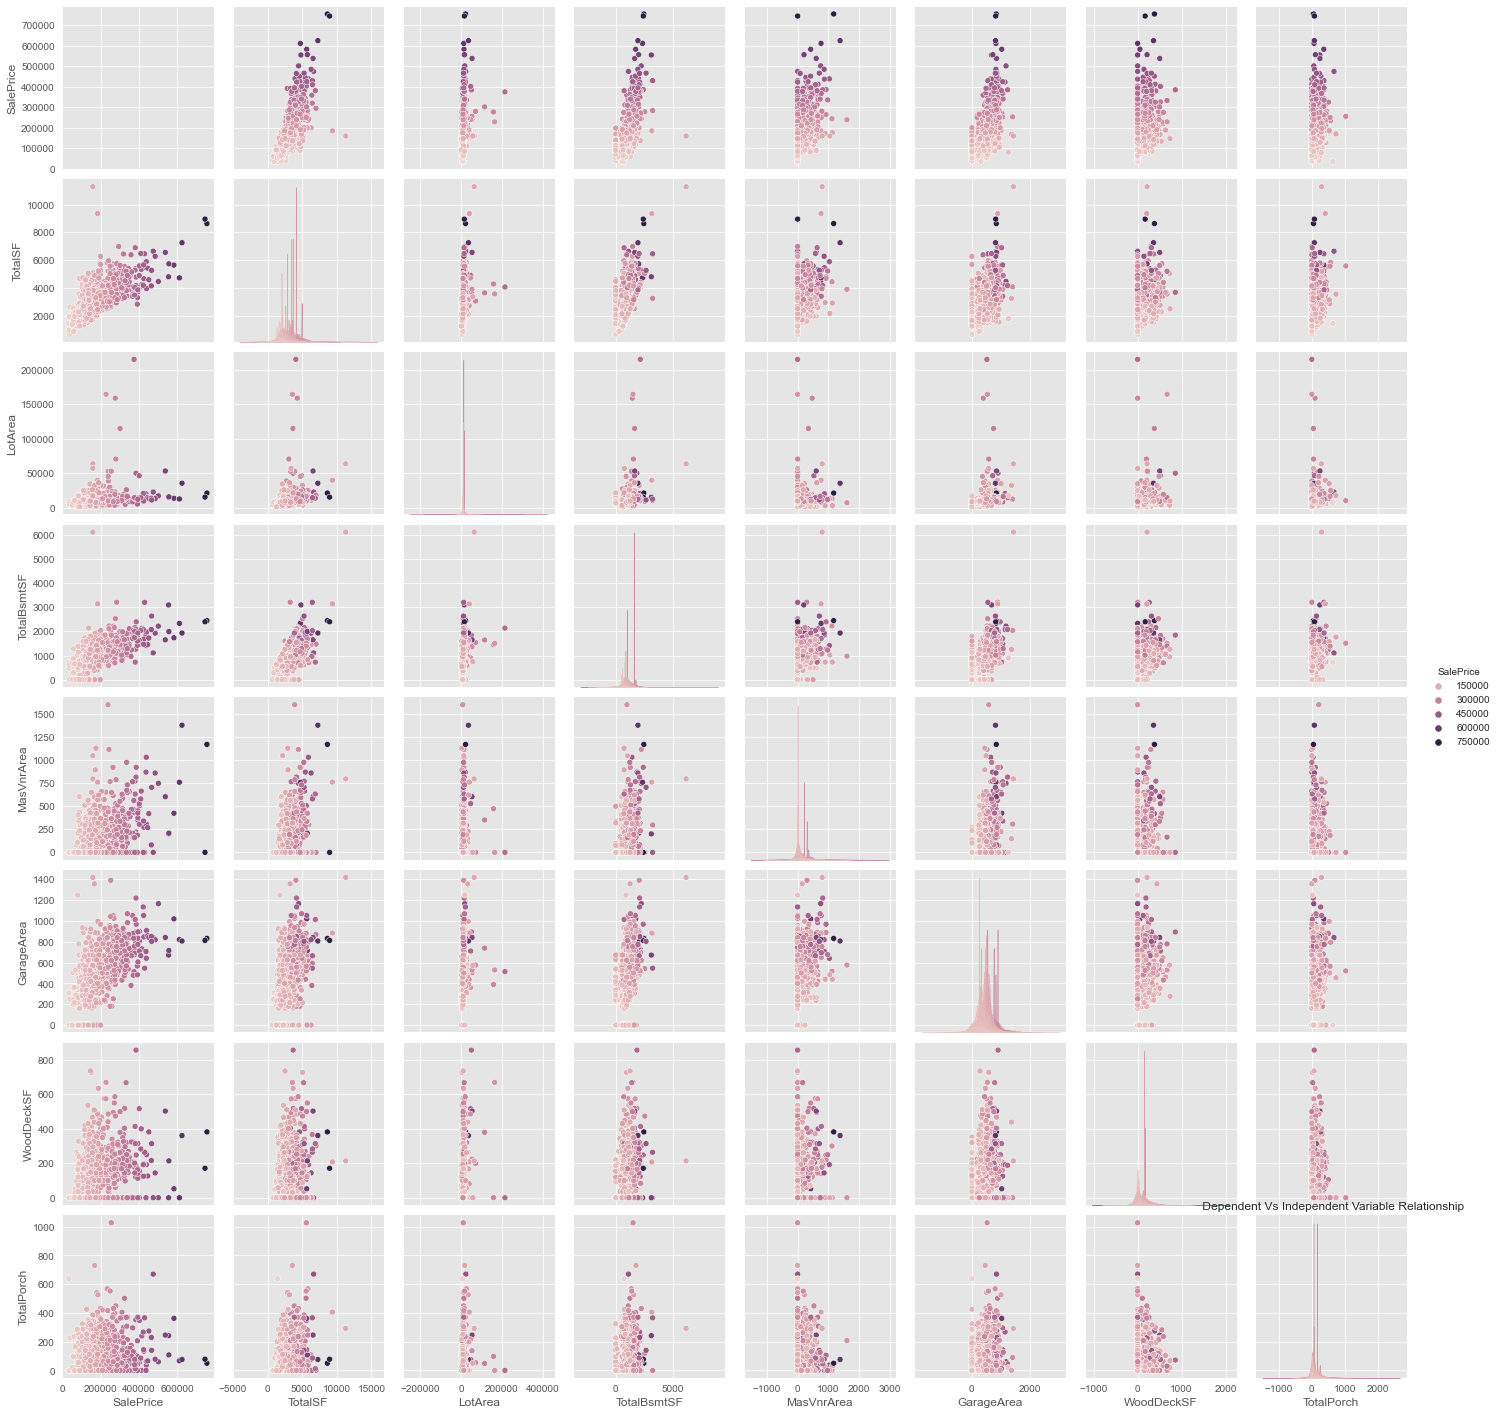

In [167]:
## Relationship between variables

sns.pairplot(
    df,
    x_vars=["SalePrice", "TotalSF",'LotArea',"TotalBsmtSF","MasVnrArea","GarageArea","WoodDeckSF","TotalPorch",],y_vars=["SalePrice", "TotalSF","LotArea","TotalBsmtSF","MasVnrArea","GarageArea","WoodDeckSF","TotalPorch",],hue = "SalePrice")

plt.title(" Dependent Vs Independent Variable Relationship", fontsize=12)
plt.show()

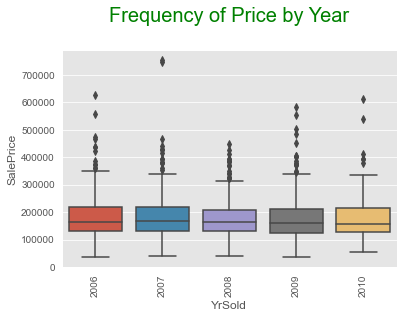

In [168]:
sns.boxplot(x = 'YrSold', y = 'SalePrice', data = df)
plt.title("Frequency of Price by Year\n", fontdict={'fontsize': 20, 'fontweight' : 20, 'color' : 'Green'})
plt.xticks(rotation=90)
plt.show()

#Median price of the properties have remained constant over years, howeer you notice there is a dip in the sale price in the year 2008

In [169]:
df.shape

(1460, 147)

In [172]:
## Visualize the impact of categorical variables on the target Variable

<AxesSubplot:xlabel='SaleCondition_Normal', ylabel='SalePrice'>

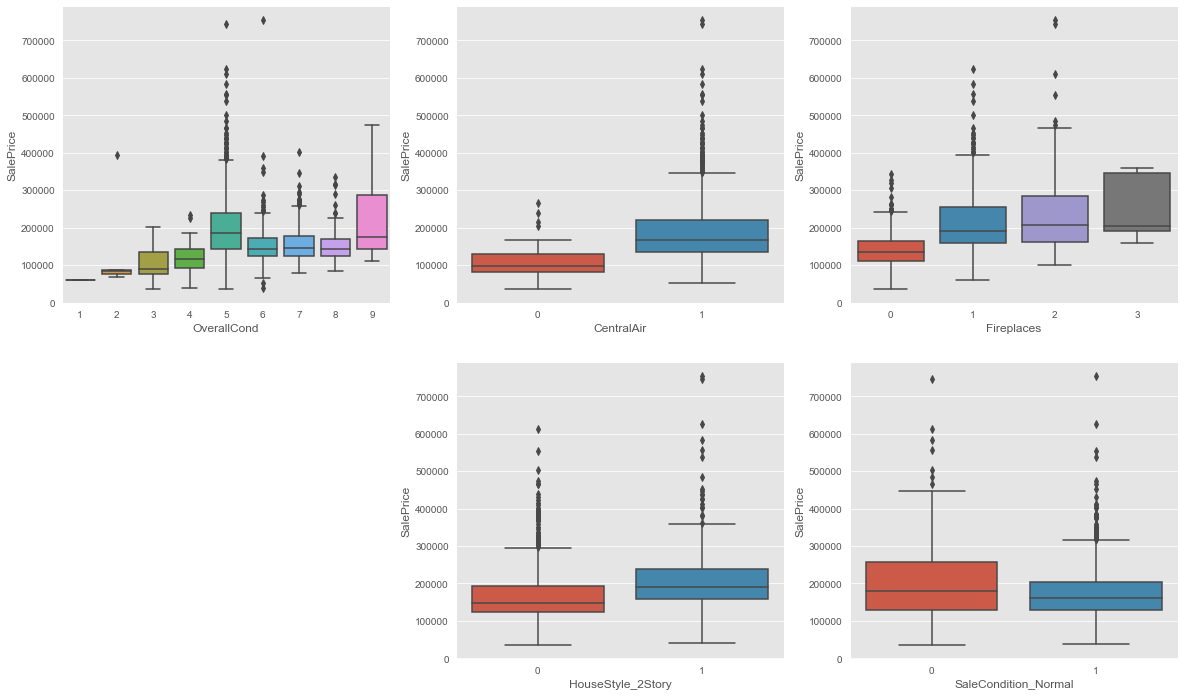

In [173]:
plt.figure(figsize=(20,12))

plt.subplot(2,3,1)
sns.boxplot(x='OverallCond',y='SalePrice',data=df)

plt.subplot(2,3,2)
sns.boxplot(x='CentralAir',y='SalePrice',data=df)

plt.subplot(2,3,3)
sns.boxplot(x='Fireplaces',y='SalePrice',data=df)

plt.subplot(2,3,5)
sns.boxplot(x='HouseStyle_2Story',y='SalePrice',data=df)

plt.subplot(2,3,6)
sns.boxplot(x='SaleCondition_Normal',y='SalePrice',data=df)


In [174]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Columns: 147 entries, MSSubClass to SaleCondition_Partial
dtypes: datetime64[ns](1), float64(1), int32(2), int64(17), uint8(126)
memory usage: 407.9 KB


In [175]:
df.shape

(1460, 147)

In [179]:
#Check the Correlation 
corr = df.corr()
print(corr)

                       MSSubClass   LotArea  OverallQual  OverallCond  \
MSSubClass               1.000000 -0.139781     0.032628    -0.059316   
LotArea                 -0.139781  1.000000     0.105806    -0.005636   
OverallQual              0.032628  0.105806     1.000000    -0.091932   
OverallCond             -0.059316 -0.005636    -0.091932     1.000000   
MasVnrArea               0.023039  0.103227     0.410111    -0.126723   
TotalBsmtSF             -0.238518  0.260833     0.537808    -0.171098   
CentralAir              -0.101774  0.049755     0.272038     0.118969   
FullBath                 0.131608  0.126031     0.550600    -0.194149   
HalfBath                 0.177354  0.014259     0.273458    -0.060769   
BedroomAbvGr            -0.023438  0.119690     0.101676     0.012980   
KitchenAbvGr             0.281721 -0.017784    -0.183882    -0.087001   
TotRmsAbvGrd             0.040380  0.190015     0.427452    -0.057583   
Fireplaces              -0.045569  0.271364     0.3

In [183]:
# Check for Outliear at 25%,50%,75%,90%,95%,99%

df.describe(percentiles=[.25,.5,.75,.90,.95,.99]).transpose()

,count,mean,std,min,25%,50%,75%,90%,95%,99%,max
MSSubClass,1460.0,56.897260,42.300571,20.0,20.00,50.0,70.00,120.0,160.00,190.00,190.0
LotArea,1460.0,10516.828082,9981.264932,1300.0,7553.50,9478.5,11601.50,14381.7,17401.15,37567.64,215245.0
OverallQual,1460.0,6.099315,1.382997,1.0,5.00,6.0,7.00,8.0,8.00,10.00,10.0
OverallCond,1460.0,5.575342,1.112799,1.0,5.00,5.0,6.00,7.0,8.00,9.00,9.0
MasVnrArea,1460.0,103.492466,180.795612,0.0,0.00,0.0,165.25,335.1,456.00,791.28,1600.0
TotalBsmtSF,1460.0,1057.429452,438.705324,0.0,795.75,991.5,1298.25,1602.2,1753.00,2155.05,6110.0
CentralAir,1460.0,0.934932,0.246731,0.0,1.00,1.0,1.00,1.0,1.00,1.00,1.0
FullBath,1460.0,1.565068,0.550916,0.0,1.00,2.0,2.00,2.0,2.00,3.00,3.0
HalfBath,1460.0,0.382877,0.502885,0.0,0.00,0.0,1.00,1.0,1.00,1.00,2.0
BedroomAbvGr,1460.0,2.866438,0.815778,0.0,2.00,3.0,3.00,4.0,4.00,5.00,8.0


### Model Building


In [58]:
# split into X and y
X = df.loc[:, ['MSSubClass','LotArea','OverallQual','OverallCond','MasVnrArea','TotalBsmtSF','CentralAir','FullBath','HalfBath','BedroomAbvGr','KitchenAbvGr','TotRmsAbvGrd','Fireplaces','GarageArea','WoodDeckSF','BsmtBath','TotalSF','TotalPorch','MSZoning_FV','MSZoning_RH','MSZoning_RL','MSZoning_RM','LotShape_IR2','LotShape_IR3','LotShape_Reg','LandContour_HLS','LandContour_Low','LandContour_Lvl','LotConfig_CulDSac','LotConfig_FR2','LotConfig_FR3','LotConfig_Inside','LandSlope_Mod','LandSlope_Sev','Neighborhood_Blueste','Neighborhood_BrDale','Neighborhood_BrkSide','Neighborhood_ClearCr','Neighborhood_CollgCr','Neighborhood_Crawfor','Neighborhood_Edwards','Neighborhood_Gilbert','Neighborhood_IDOTRR','Neighborhood_MeadowV','Neighborhood_Mitchel','Neighborhood_NAmes','Neighborhood_NPkVill','Neighborhood_NWAmes','Neighborhood_NoRidge','Neighborhood_NridgHt','Neighborhood_OldTown','Neighborhood_SWISU','Neighborhood_Sawyer','Neighborhood_SawyerW','Neighborhood_Somerst','Neighborhood_StoneBr','Neighborhood_Timber','Neighborhood_Veenker','BldgType_2fmCon','BldgType_Duplex','BldgType_Twnhs','BldgType_TwnhsE','HouseStyle_1.5Unf','HouseStyle_1Story','HouseStyle_2.5Fin','HouseStyle_2.5Unf','HouseStyle_2Story','HouseStyle_SFoyer','HouseStyle_SLvl','RoofStyle_Gable','RoofStyle_Gambrel','RoofStyle_Hip','RoofStyle_Mansard','RoofStyle_Shed','Exterior1st_AsphShn','Exterior1st_BrkComm','Exterior1st_BrkFace','Exterior1st_CBlock','Exterior1st_CemntBd','Exterior1st_HdBoard','Exterior1st_ImStucc','Exterior1st_MetalSd','Exterior1st_Plywood','Exterior1st_Stone','Exterior1st_Stucco','Exterior1st_VinylSd','Exterior1st_Wd Sdng','Exterior1st_WdShing','MasVnrType_BrkFace','MasVnrType_None','MasVnrType_Stone','ExterQual_Fa','ExterQual_Gd','ExterQual_TA','Foundation_CBlock','Foundation_PConc','Foundation_Slab','Foundation_Stone','Foundation_Wood','BsmtQual_Fa','BsmtQual_Gd','BsmtQual_TA','BsmtExposure_Gd','BsmtExposure_Mn','BsmtExposure_No','BsmtFinType1_BLQ','BsmtFinType1_GLQ','BsmtFinType1_LwQ','BsmtFinType1_Rec','BsmtFinType1_Unf','Heating_GasA','Heating_GasW','Heating_Grav','Heating_OthW','Heating_Wall','HeatingQC_Fa','HeatingQC_Gd','HeatingQC_Po','HeatingQC_TA','Electrical_FuseF','Electrical_FuseP','Electrical_Mix','Electrical_SBrkr','KitchenQual_Fa','KitchenQual_Gd','KitchenQual_TA','Functional_Maj2','Functional_Min1','Functional_Min2','Functional_Mod','Functional_Sev','Functional_Typ','GarageType_Attchd','GarageType_Basment','GarageType_BuiltIn','GarageType_CarPort','GarageType_Detchd','PavedDrive_P','PavedDrive_Y','SaleCondition_AdjLand','SaleCondition_Alloca','SaleCondition_Family','SaleCondition_Normal','SaleCondition_Partial']] # predictors in variable X
y = df["SalePrice"] # response variable in Y

In [59]:
# scaling the features - necessary before using Ridge or Lasso
from sklearn.preprocessing import scale
# storing column names in cols, since column names are (annoyingly) lost after 
# scaling (the df is converted to a numpy array)
cols = X.columns
X = pd.DataFrame(scale(X))
X.columns = cols
X.columns

Index(['MSSubClass', 'LotArea', 'OverallQual', 'OverallCond', 'MasVnrArea',
       'TotalBsmtSF', 'CentralAir', 'FullBath', 'HalfBath', 'BedroomAbvGr',
       ...
       'GarageType_BuiltIn', 'GarageType_CarPort', 'GarageType_Detchd',
       'PavedDrive_P', 'PavedDrive_Y', 'SaleCondition_AdjLand',
       'SaleCondition_Alloca', 'SaleCondition_Family', 'SaleCondition_Normal',
       'SaleCondition_Partial'],
      dtype='object', length=144)

In [60]:
# split into train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    train_size=0.7,
                                                    test_size = 0.3, random_state=100)

### Linear Regression 

In [184]:
# Instantiate
lm = LinearRegression()

# Fit a line
lm.fit(X_train, y_train)

# running RFE
rfe = RFE(lm, 50)            
rfe = rfe.fit(X_train, y_train)

In [185]:
# Print the coefficients and intercept
print(lm.intercept_)
print(lm.coef_)

-868247728163177.8
[-3.26108056e+03  3.38196894e+03  1.35678093e+04  3.96618890e+03
  2.37508205e+03 -3.46303202e+03  1.45840246e+02  5.60364188e+03
  2.18280899e+03 -2.88450148e+02 -3.96899522e+03  1.23828198e+03
  1.80019902e+03  3.59024449e+03  1.60560062e+03  3.88728721e+03
  2.74481328e+04  6.77253245e+01  5.48347785e+03  3.66663110e+03
  1.25155466e+04  1.08617558e+04  1.99525268e+01 -2.74856633e+03
  5.99336175e+02  4.47265130e+03  4.27116892e+03  7.69381442e+03
  2.29346346e+03 -2.25438828e+03 -6.16457378e+02 -3.83165647e+02
  1.14830134e+03 -4.95643812e+02  1.96926354e+02  3.58321136e+02
 -8.48917495e+02  7.14302243e+02  4.51037145e+02  4.39980048e+03
 -5.53703953e+03  1.82869690e+03 -1.29305510e+03 -3.27769792e+02
 -1.86330592e+03 -3.75838834e+03  7.56700996e+02 -1.18478964e+03
  1.01261582e+04  8.19701050e+03 -3.17547824e+03 -3.59235234e+02
 -2.24305470e+03  6.44642652e+02  7.02564708e+03  4.84838452e+03
  3.00439226e+02  1.70173226e+03 -1.24009948e+02 -1.35654392e+03
 -3.11

In [193]:
y_pred_train = lm.predict(X_train)
y_pred_test = lm.predict(X_test)

metric = []
r2_train_lr = r2_score(y_train, y_pred_train)
print(r2_train_lr)
metric.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print(r2_test_lr)
metric.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print(rss1_lr)
metric.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print(rss2_lr)
metric.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print(mse_train_lr)
metric.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print(mse_test_lr)
metric.append(mse_test_lr**0.5)

0.8848947248648502
-5.700884429130063e+23
734452090868.3281
1.6069154374467937e+36
719345828.4704487
3.668756706499529e+33


In [188]:
#Final Metric - Linear Regression
metric

[0.8848947248648502,
 -5.700884429130063e+23,
 734452090868.3281,
 1.6069154374467937e+36,
 26820.623193178206,
 6.057026255927515e+16]

In [195]:
# Assign the columns selected by RFE to cols

col = X_train.columns[rfe.support_]

# assign the 50 features selected using RFE to a dataframe and view them

rfe_df = pd.DataFrame(list(zip(X_train.columns,rfe.support_,rfe.ranking_)), columns=['Variable', 'rfe_support', 'rfe_ranking'])
rfe_df = rfe_df.loc[rfe_df['rfe_support'] == True]
rfe_df.reset_index(drop=True, inplace=True)

rfe_df

,Variable,rfe_support,rfe_ranking
0,MSSubClass,True,1
1,LotArea,True,1
2,OverallQual,True,1
3,OverallCond,True,1
4,MasVnrArea,True,1
5,FullBath,True,1
6,HalfBath,True,1
7,KitchenAbvGr,True,1
8,Fireplaces,True,1
9,GarageArea,True,1


In [196]:
# Assign the 50 columns to X_train_rfe
X_train_rfe = X_train[col]

In [197]:
# Associate the new 50 columns to X_train and X_test for further analysis
X_train = X_train_rfe[X_train_rfe.columns]
X_test =  X_test[X_train.columns]

#### Perform Linear Regression Prediction using Ridge Regularization Technique

### Ridge : 

In [214]:
# Choose Alhpa Values to tune

params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}

#Instantiate
ridge = Ridge()

# cross validation
folds = 5
cv_result = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error',  
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
cv_result.fit(X_train, y_train) 


Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [215]:
# Printing the best hyperparameter alpha
print(cv_result.best_params_)

{'alpha': 20}


In [222]:
#Fitting Ridge model for alpha = 20 and printing coefficients which have been penalised
alpha = 20
ridge = Ridge(alpha=alpha)

ridge.fit(X_train, y_train)
print(ridge.coef_)


[ -4313.22947447   3517.2381581   15262.68788389   5061.89304448
   2998.29482276   6318.79913658   3294.10864277  -4141.25357216
   2837.86030121   3972.35779523   4599.35261032  22237.22688277
   1008.05891831   2444.66597121   6775.56192669   3631.18633797
  -2714.88251576   4123.69517274   4342.55196774   6486.19158608
   4366.74512445  -4527.95332791  -3038.88224037   9825.52623625
   8025.55017301   7532.96141866   4414.69307047  -2305.819878
  -2031.17473008   5103.50684416   3624.93675953   3767.28052026
   2378.50951399   3537.18027033  -3575.30262916   4392.42571212
   5185.72462375  -5307.71054461 -15278.84657581 -15873.65261121
   6040.88158     -4394.65666775  -2568.38614176   4031.28704746
   3469.38293831   2109.85335556   1851.37017737  -5345.62464232
 -13435.40218979 -14544.45042598]


In [223]:
# Lets calculate some metrics such as R2 score, RSS and RMSE
y_pred_train = ridge.predict(X_train)
y_pred_test = ridge.predict(X_test)

metric2 = []
r2_train_lr = r2_score(y_train, y_pred_train)
print(r2_train_lr)
metric2.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print(r2_test_lr)
metric2.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print(rss1_lr)
metric2.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print(rss2_lr)
metric2.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print(mse_train_lr)
metric2.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print(mse_test_lr)
metric2.append(mse_test_lr**0.5)

0.8734224833997001
0.8518269113305919
807653008212.3221
417657341693.1697
791041144.1844487
953555574.6419399


In [224]:
# Final Metric - Ridge 
# r2score train and test 
metric2

[0.8734224833997001,
 0.8518269113305919,
 807653008212.3221,
 417657341693.1697,
 28125.45367073123,
 30879.695183760152]

In [230]:
# display the mean scores
ridge_results = pd.DataFrame(cv_result.cv_results_)
Ridge_results = ridge_results[ridge_results['param_alpha']<=500]
ridge_results[['param_alpha', 'mean_train_score', 'mean_test_score', 'rank_test_score']].sort_values(by = ['rank_test_score'])

,param_alpha,mean_train_score,mean_test_score,rank_test_score
23,20,-17124.307723,-18440.034330,1
22,10.0,-17117.690638,-18449.169861,2
21,9.0,-17117.541665,-18450.620202,3
20,8.0,-17117.529382,-18451.926795,4
19,7.0,-17117.825510,-18453.176177,5
18,6.0,-17118.648376,-18454.258412,6
17,5.0,-17120.007986,-18455.171412,7
16,4.0,-17121.419557,-18457.513781,8
15,3.0,-17122.949547,-18461.738134,9
14,2.0,-17125.628185,-18468.244979,10


In [231]:
# Put the Features and coefficienst in a dataframe

ridge_df = pd.DataFrame({'Features':X_train.columns, 'Coefficient':ridge.coef_.round(4)})
ridge_df.reset_index(drop=True, inplace=True)
ridge_df

,Features,Coefficient
0,MSSubClass,-4313.2295
1,LotArea,3517.2382
2,OverallQual,15262.6879
3,OverallCond,5061.8930
4,MasVnrArea,2998.2948
5,FullBath,6318.7991
6,HalfBath,3294.1086
7,KitchenAbvGr,-4141.2536
8,Fireplaces,2837.8603
9,GarageArea,3972.3578


In [259]:
#getting top 10 parameters from ridge
model_parameter = list(ridge.coef_)
model_parameter.insert(0,ridge.intercept_)
cols = X_train[ridge_df.Features]

ridge_coef = pd.DataFrame(list(zip(cols,model_parameter)))
ridge_coef.columns = ['Feaure','Coefficient']
Rsort_df = ridge_coef.sort_values(by=['Coefficient'], ascending=False)
Rsort_df


,Feaure,Coefficient
0,MSSubClass,180488.373853
12,MSZoning_FV,22237.226883
3,OverallCond,15262.687884
24,Neighborhood_NridgHt,9825.526236
25,Neighborhood_Somerst,8025.550173
26,Neighborhood_StoneBr,7532.961419
15,MSZoning_RM,6775.561927
20,Neighborhood_Crawfor,6486.191586
6,HalfBath,6318.799137
41,BsmtExposure_No,6040.881580


### Lasso :

In [239]:
lasso = Lasso()

# cross validation
model_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

model_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [240]:
# Printing the best hyperparameter alpha
print(model_cv.best_params_)

{'alpha': 500}


In [241]:
#Fitting Ridge model for alpha = 100 and printing coefficients which have been penalised

alpha =500

lasso = Lasso(alpha=alpha)
        
lasso.fit(X_train, y_train) 

Lasso(alpha=500)

In [242]:
#Print the co-efficients
lasso.coef_

array([ -5755.33446361,   3464.82395068,  16740.79416337,   4511.52356571,
         2127.17735127,   4945.49847585,   2537.4836792 ,  -3090.02370642,
         2661.22521263,   4078.98666865,   4580.15612095,  23242.46435882,
            0.        ,    696.41721347,   3307.23361508,     -0.        ,
        -2375.24032009,   2785.51169741,   3034.68066604,   4516.28308159,
         3592.94937002,  -4228.9462245 ,  -2247.83405881,   9581.99315927,
         7502.41290097,   6019.2011452 ,   3601.77201566,  -1167.60420206,
           -0.        ,   3887.33631301,   3109.87342822,   3210.5755256 ,
            0.        ,      0.        ,  -2929.51463545,   1708.17178356,
         2979.68305395,  -4700.13280695, -13787.88288371, -14867.64876533,
         5954.64690894,  -4389.41964315,  -2447.62429114,      0.        ,
            0.        ,     -0.        ,      0.        ,  -4358.39638047,
       -10991.91837334, -12361.30462143])

In [243]:
# Lets calculate some metrics such as R2 score, RSS and RMSE

y_pred_train = lasso.predict(X_train)
y_pred_test = lasso.predict(X_test)

metric3 = []
r2_train_lr = r2_score(y_train, y_pred_train)
print(r2_train_lr)
metric3.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print(r2_test_lr)
metric3.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print(rss1_lr)
metric3.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print(rss2_lr)
metric3.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print(mse_train_lr)
metric3.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print(mse_test_lr)
metric3.append(mse_test_lr**0.5)

0.8691793430795132
0.8537231290332583
834727208559.3518
412312449094.3916
817558480.4694924
941352623.5031772


In [244]:
#Final Metric - Lasso
metric3

[0.8691793430795132,
 0.8537231290332583,
 834727208559.3518,
 412312449094.3916,
 28592.97956613638,
 30681.470360841202]

In [257]:
# Put the Features and coefficienst in a dataframe

Lasso_df = pd.DataFrame({'Features':X_train.columns, 'Coefficient':lasso.coef_.round(4)})
Lasso_df.reset_index(drop=True, inplace=True)
Lsort_df = Lasso_df.sort_values(by=['Coefficient'], ascending=False)
Lsort_df

,Features,Coefficient
11,TotalSF,23242.4644
2,OverallQual,16740.7942
23,Neighborhood_NoRidge,9581.9932
24,Neighborhood_NridgHt,7502.4129
25,Neighborhood_Somerst,6019.2011
40,BsmtExposure_Gd,5954.6469
5,FullBath,4945.4985
10,BsmtBath,4580.1561
19,LandContour_Lvl,4516.2831
3,OverallCond,4511.5236


In [246]:
# Creating a table which contain all the metrics

lr_table = {'Metric': ['R2 Score (Train)','R2 Score (Test)','RSS (Train)','RSS (Test)',
                       'MSE (Train)','MSE (Test)'],'Linear Regression': metric}

lr_metric = pd.DataFrame(lr_table ,columns = ['Metric', 'Linear Regression'] )

rg_metric = pd.Series(metric2, name = 'Ridge Regression')
ls_metric = pd.Series(metric3, name = 'Lasso Regression')

final_metric = pd.concat([lr_metric, rg_metric, ls_metric], axis = 1)

final_metric

,Metric,Linear Regression,Ridge Regression,Lasso Regression
0,R2 Score (Train),8.848947e-01,8.734225e-01,8.691793e-01
1,R2 Score (Test),-5.700884e+23,8.518269e-01,8.537231e-01
2,RSS (Train),7.344521e+11,8.076530e+11,8.347272e+11
3,RSS (Test),1.606915e+36,4.176573e+11,4.123124e+11
4,MSE (Train),2.682062e+04,2.812545e+04,2.859298e+04
5,MSE (Test),6.057026e+16,3.087970e+04,3.068147e+04


## Conclusion

1. Top 10 Variables which Best Describes the SalePrices of the Property are

    TotalSF,OverallCond, OverallQual,MSZoning,NeighbourHood,BsmtExposure,FullBath,HalfBath,GrageArea,LotArea

2. Optimal Alpha Value 

    Ridge : 20
    Lasso : 500